The steps are broadly
1. Read and understand  the data
2. Clean the data
3. prepare the data for modelling
4.Modelling
5.Final analysis and reco

# 1.Read and visualise the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
retail_df=pd.read_csv("/content/Online+Retail (1).csv",sep=",",encoding="ISO-8859-1",header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# basics of the df
retail_df.shape

(61879, 8)

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61879 entries, 0 to 61878
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    61879 non-null  object 
 1   StockCode    61879 non-null  object 
 2   Description  61716 non-null  object 
 3   Quantity     61878 non-null  float64
 4   InvoiceDate  61878 non-null  object 
 5   UnitPrice    61878 non-null  float64
 6   CustomerID   38377 non-null  float64
 7   Country      61878 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.8+ MB


# 2. Clean the data

In [ ]:
# missing values
round(100*(retail_df.isnull().sum())/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.26
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     37.98
Country         0.00
dtype: float64

In [ ]:
# drop all rows having missin g value
retail_df=retail_df.dropna()
retail_df.shape

(38377, 8)

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# new column : amount
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

<ipython-input-14-5905067ea83e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


 # 3.Prepare the data for modelling

- R (Recency) : Numner of days since last purchase
- F (Frequecy) : Number of transactions
- M (Monetary) : Total amount of transactions (revenue contributed)

In [ ]:
#monetary
grouped_df=retail_df.groupby('CustomerID') ['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,711.79
2,12348.0,892.80
3,12356.0,2271.62
4,12359.0,547.50


In [ ]:
# frequency
frequency=retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,31
2,12348.0,17
3,12356.0,36
4,12359.0,16


In [ ]:
# merge the two df
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')

grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,711.79,31
2,12348.0,892.80,17
3,12356.0,2271.62,36
4,12359.0,547.50,16


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38377 entries, 0 to 61877
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    38377 non-null  object 
 1   StockCode    38377 non-null  object 
 2   Description  38377 non-null  object 
 3   Quantity     38377 non-null  float64
 4   InvoiceDate  38377 non-null  object 
 5   UnitPrice    38377 non-null  float64
 6   CustomerID   38377 non-null  float64
 7   Country      38377 non-null  object 
 8   amount       38377 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.9+ MB


In [ ]:
#recency
#convert to datetime
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38377 entries, 0 to 61877
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    38377 non-null  object        
 1   StockCode    38377 non-null  object        
 2   Description  38377 non-null  object        
 3   Quantity     38377 non-null  float64       
 4   InvoiceDate  38377 non-null  datetime64[ns]
 5   UnitPrice    38377 non-null  float64       
 6   CustomerID   38377 non-null  float64       
 7   Country      38377 non-null  object        
 8   amount       38377 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 2.9+ MB


In [ ]:
#compute the max date
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-01-18 13:38:00')

In [ ]:
#compute the diff
retail_df['diff']=max_date-retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,48 days 05:12:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 05:12:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,48 days 05:12:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 05:12:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 05:12:00


In [ ]:
# recency
last_purchase=retail_df.groupby('CustomerID') ['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase

,CustomerID,diff
0,12346.0,0 days 03:21:00
1,12347.0,41 days 22:41:00
2,12348.0,32 days 18:29:00
3,12356.0,0 days 03:48:00
4,12359.0,6 days 00:55:00
...,...,...
1170,18256.0,29 days 05:11:00
1171,18259.0,41 days 00:00:00
1172,18260.0,8 days 22:56:00
1173,18269.0,32 days 21:59:00


In [ ]:
# merge the two df
grouped_df=pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')
grouped_df.columns=['CustomerID', 'amount', 'frequency','recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,0 days 03:21:00
1,12347.0,711.79,31,41 days 22:41:00
2,12348.0,892.80,17,32 days 18:29:00
3,12356.0,2271.62,36,0 days 03:48:00
4,12359.0,547.50,16,6 days 00:55:00


In [ ]:
#number of days only
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,0
1,12347.0,711.79,31,41
2,12348.0,892.80,17,32
3,12356.0,2271.62,36,0
4,12359.0,547.50,16,6


<Axes: ylabel='amount'>

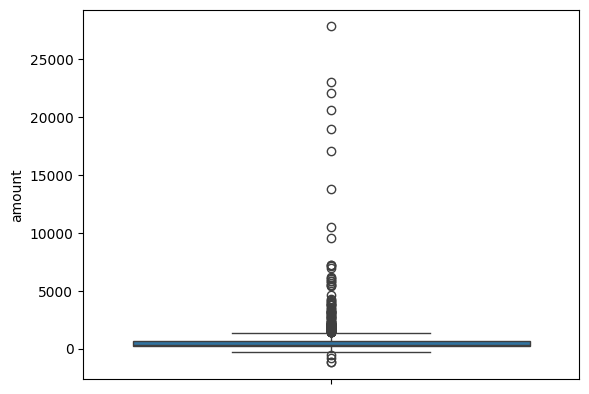

In [ ]:
# 1. outlier treatment
sns.boxplot(grouped_df['amount'])

<Axes: ylabel='frequency'>

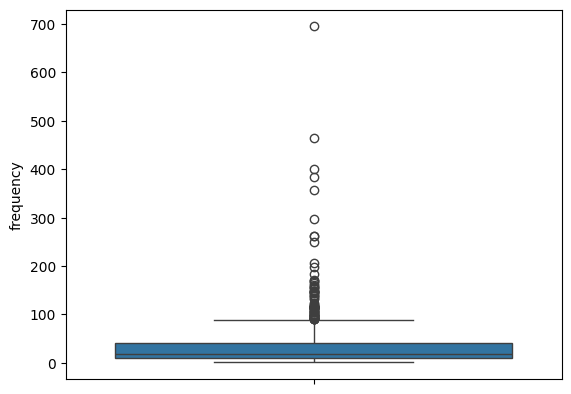

In [ ]:
sns.boxplot(grouped_df['frequency'])

<Axes: ylabel='recency'>

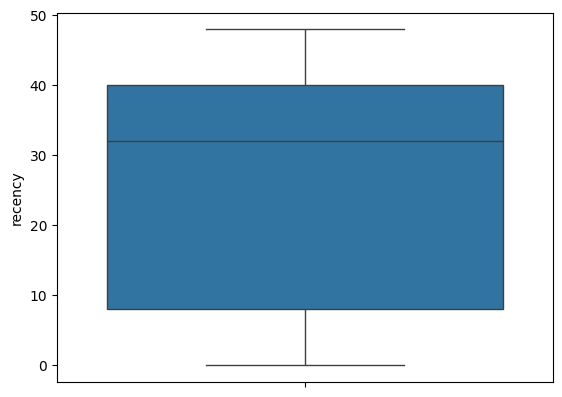

In [ ]:
sns.boxplot(grouped_df['recency'])

In [ ]:
# two types of outliers:
# - statistical
# - domain specific

In [ ]:
# - removeing statistical outliers
Q1=grouped_df.amount.quantile(0.05)
Q3=grouped_df.amount.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.amount>=Q1 - 1.5 *IQR) & (grouped_df.amount<=Q3 +1.5 *IQR)]

#outlier treatment for recency

Q1=grouped_df.recency.quantile(0.05)
Q3=grouped_df.recency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.recency>=Q1 - 1.5 *IQR) & (grouped_df.recency<=Q3 +1.5 *IQR)]

#Outliers treatmnent for frequency
Q1=grouped_df.frequency.quantile(0.05)
Q3=grouped_df.frequency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.frequency>=Q1 - 1.5 *IQR) & (grouped_df.frequency<=Q3 +1.5 *IQR)]



In [ ]:
# 2. rescaling
rfm_df=grouped_df[['amount','frequency','recency']]

scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(1149, 3)

## Hopkins Statistic Code

In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']

In [ ]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.8727161773250911

In [ ]:
rfm_df_scaled

,amount,frequency,recency
0,-0.821546,-0.898718,-1.605070
1,0.325820,0.057357,0.958091
2,0.617598,-0.404196,0.395446
3,2.840179,0.222198,-1.605070
4,0.060993,-0.437164,-1.229974
...,...,...,...
1144,-0.902305,-0.832782,0.207897
1145,-0.214972,-0.733877,0.958091
1146,0.448295,0.255166,-1.104941
1147,-0.597647,-0.700909,0.395446


# 4. Modelling

In [ ]:
#k- means with some arbitary k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [ ]:
len(kmeans.labels_)

1149

## Finding the Optimal Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

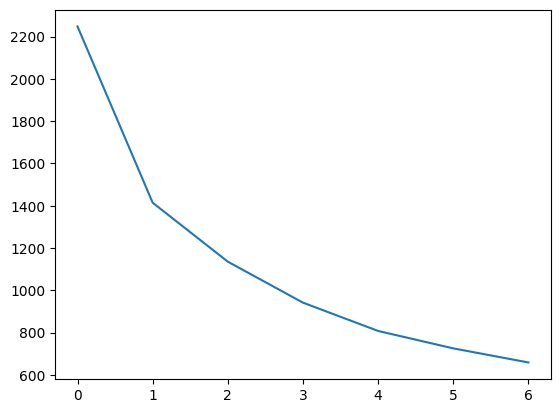

In [ ]:
# elbow-curve/SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled )
  ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [ ]:
#[2,3,4,5,6,7,8]

In [ ]:
# Silhouette Analysis
for num_clusters in range_n_clusters:
  # intialise kmeans
  kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled )
  cluster_labels=kmeans.labels_

  # silhouette score
  silhouette_avg= silhouette_score(rfm_df_scaled,cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.42394730660328905
For n_clusters=3, the silhouette score is 0.47667748580187275
For n_clusters=4, the silhouette score is 0.48217160266444437
For n_clusters=5, the silhouette score is 0.4484030230631305


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.4313016252602912
For n_clusters=7, the silhouette score is 0.44351823983918187


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.3764693193833255


In [ ]:
# final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
# assign the label
grouped_df['cluster_id']=kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,0,1
1,12347.0,711.79,31,41,0
2,12348.0,892.80,17,32,0
3,12356.0,2271.62,36,0,2
4,12359.0,547.50,16,6,1


<Axes: xlabel='cluster_id', ylabel='amount'>

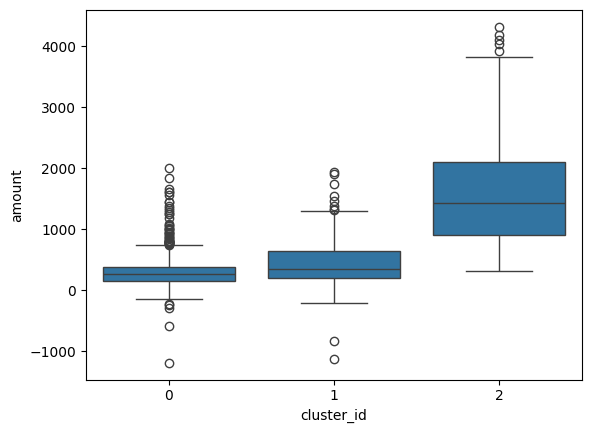

In [ ]:
#plot
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='recency'>

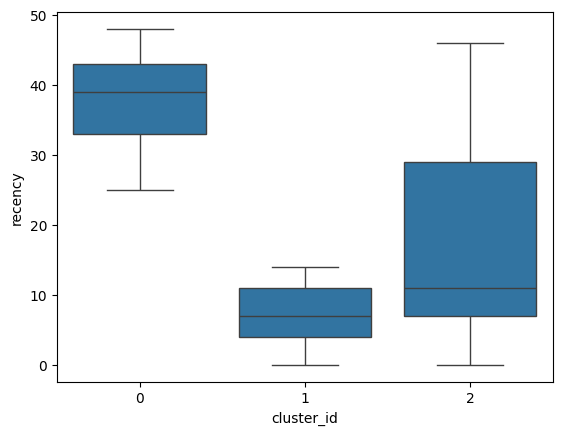

In [ ]:
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='frequency'>

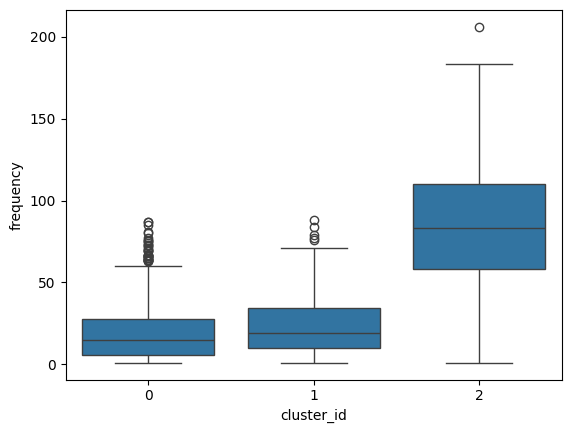

In [ ]:
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)

# **Hierarchical Clustering**

In [ ]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.821546,-0.898718,-1.605070
1,0.325820,0.057357,0.958091
2,0.617598,-0.404196,0.395446
3,2.840179,0.222198,-1.605070
4,0.060993,-0.437164,-1.229974


In [ ]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,0,1
1,12347.0,711.79,31,41,0
2,12348.0,892.80,17,32,0
3,12356.0,2271.62,36,0,2
4,12359.0,547.50,16,6,1


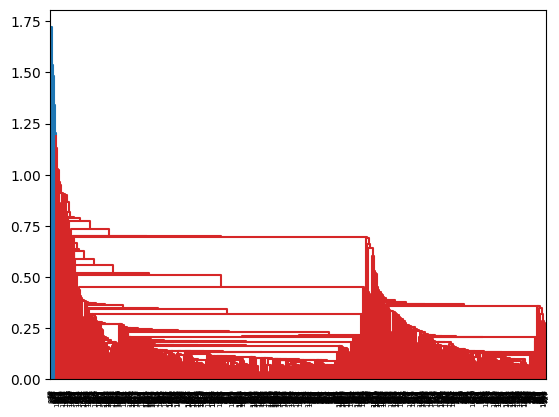

In [ ]:
# single linkage
mergings= linkage(rfm_df_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

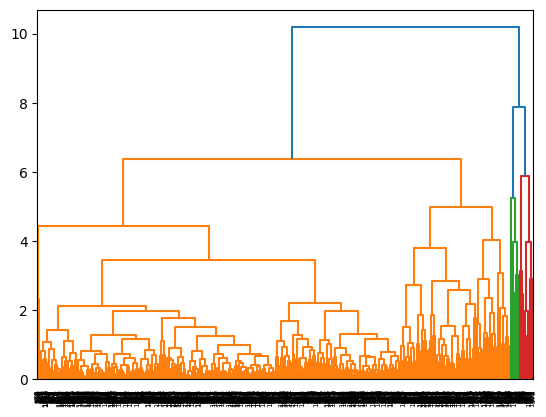

In [ ]:
#complete Linkage
mergings= linkage(rfm_df_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# assgin cluster lables
grouped_df['cluster_labels']=cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,0,1,0
1,12347.0,711.79,31,41,0,0
2,12348.0,892.80,17,32,0,0
3,12356.0,2271.62,36,0,2,0
4,12359.0,547.50,16,6,1,0


<Axes: xlabel='cluster_labels', ylabel='recency'>

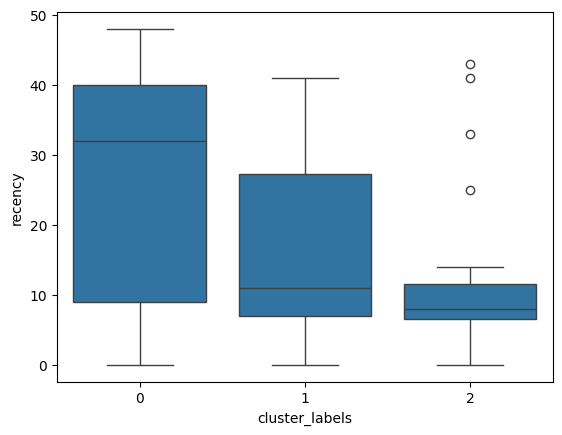

In [ ]:
# plots
sns.boxplot(x='cluster_labels',y='recency',data=grouped_df)

<Axes: xlabel='cluster_labels', ylabel='frequency'>

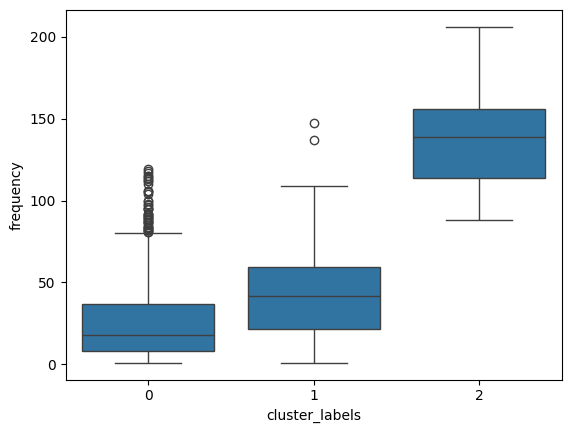

In [ ]:
# plots
sns.boxplot(x='cluster_labels',y='frequency',data=grouped_df)

<Axes: xlabel='cluster_labels', ylabel='amount'>

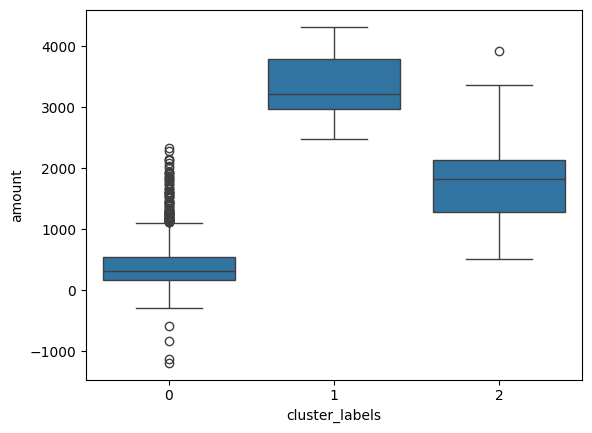

In [ ]:
# plots
sns.boxplot(x='cluster_labels',y='amount',data=grouped_df)